In [1]:
import pandas as pd
import numpy as np
import math
import os
import matplotlib.pyplot as plt


In [2]:
# Load the Data Set
xls = pd.ExcelFile('ANZ synthesised transaction dataset.xlsx')

df = pd.read_excel(xls)

In [3]:
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [4]:
# Shape
print(df.shape)
# List all columns
print(df.columns)

(12043, 23)
Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')


In [5]:
df[['age']]
total_age = 0
for age in df['age']:
    total_age += age

avg_age = total_age // df.shape[0]
print("Average Age: {}".format(avg_age))

Average Age: 30


In [6]:
df[['amount']].describe(include = 'all')

,amount
count,12043.000000
mean,187.933588
std,592.599934
min,0.100000
25%,16.000000
50%,29.000000
75%,53.655000
max,8835.980000


In [7]:
# Transaction by month
# {Month: [Count, Total_Amount]}
txn_by_mth = {
'August': {'Count': 0, 'Amount': 0}, 
'September': {'Count': 0, 'Amount': 0}, 
'October': {'Count': 0, 'Amount': 0}
}

In [8]:
ind = 0 # for counting index 
for date in df['date']:
    if date.month == 8:
        txn_by_mth['August']['Count'] += 1
        txn_by_mth['August']['Amount'] += df['amount'][ind]
    elif date.month == 9:
        txn_by_mth['September']['Count'] += 1
        txn_by_mth['September']['Amount'] += df['amount'][ind]
    elif date.month == 10:
        txn_by_mth['October']['Count'] += 1
        txn_by_mth['October']['Amount'] += df['amount'][ind]
    ind += 1

txn_by_mth

{'August': {'Count': 3943, 'Amount': 729935.5200000011},
 'September': {'Count': 4013, 'Amount': 730550.209999999},
 'October': {'Count': 4087, 'Amount': 802798.4699999987}}

In [9]:
txn_by_mth =  pd.DataFrame(txn_by_mth)
txn_by_mth

,August,September,October
Count,3943.00,4013.00,4087.00
Amount,729935.52,730550.21,802798.47


In [10]:
# Analyze Average transactions by month and average transaction count

avg_txn_by_mth = {
    'August': {
        'avg_cnt': txn_by_mth['August']['Count'] / 31,
        'avg_amt': txn_by_mth['August']['Amount'] / txn_by_mth['August']['Count']
    },
    'September': {
        'avg_cnt': txn_by_mth['September']['Count'] / 30, 
        'avg_amt': txn_by_mth['September']['Amount'] / txn_by_mth['September']['Count']
    },
    'October': {
        'avg_cnt': txn_by_mth['October']['Count'] / 31, 
        'avg_amt': txn_by_mth['October']['Amount'] / txn_by_mth['October']['Count']
    }
}

avg_txn_by_mth = pd.DataFrame(avg_txn_by_mth)
avg_txn_by_mth

,August,September,October
avg_cnt,127.193548,133.766667,131.838710
avg_amt,185.121867,182.045903,196.427323


In [11]:
# Transform the df for plotting
txn_by_mth = txn_by_mth.T
txn_by_mth['Months'] = ['August', 'September', 'October']
txn_by_mth = txn_by_mth.set_index('Months')
avg_txn_by_mth = avg_txn_by_mth.T
avg_txn_by_mth['Months'] = ['August', 'September', 'October']
avg_txn_by_mth = avg_txn_by_mth.set_index('Months')

In [12]:
txn_by_mth

,Count,Amount
Months,,
August,3943.0,729935.52
September,4013.0,730550.21
October,4087.0,802798.47


In [13]:
avg_txn_by_mth

,avg_cnt,avg_amt
Months,,
August,127.193548,185.121867
September,133.766667,182.045903
October,131.838710,196.427323


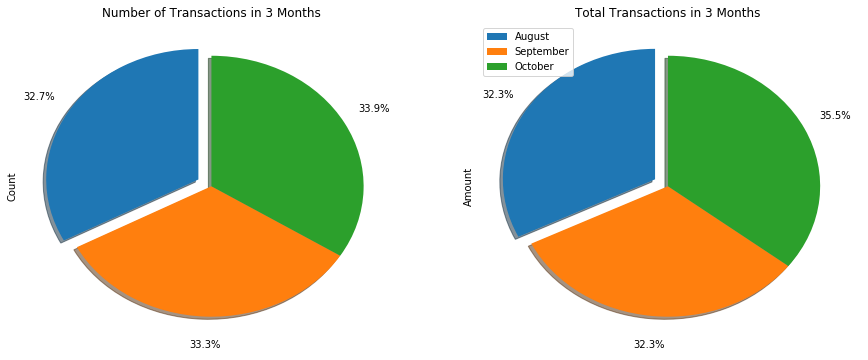

In [14]:
#Plot txn_by_mth side by side
fig = plt.figure() # Create figure

# Add subplots
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)
explode_list = [0.1, 0, 0]

# For sub_ plot 1
txn_by_mth['Count'].plot(
	kind = 'pie',
	figsize = (15, 6),
	autopct = '%1.1f%%', 
	startangle = 90, 
	shadow = True, 
	labels = None, 
	pctdistance = 1.22, 
	explode = explode_list, 
	ax = ax0
	)
ax0.set_title("Number of Transactions in 3 Months")


# For sub_plot 2
txn_by_mth['Amount'].plot(
	kind = 'pie', 
	figsize = (15, 6), 
	autopct = '%1.1f%%', 
	startangle = 90, 
	shadow = True, 
	labels = None, 
	pctdistance = 1.22, 
	explode = explode_list, 
	ax = ax1
	)
ax1.set_title("Total Transactions in 3 Months")

plt.legend(labels = txn_by_mth.index, loc = 'upper left')

Text(0,0.5,'Average')

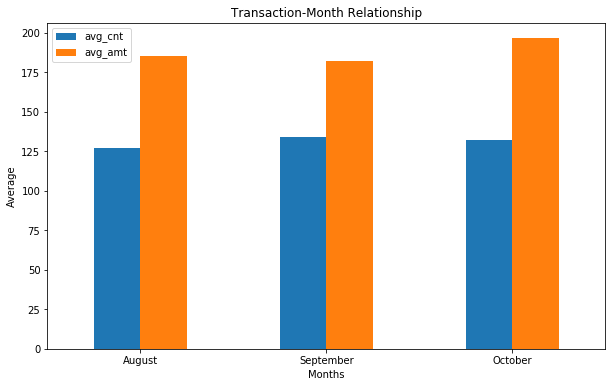

In [83]:
avg_txn_by_mth.plot(kind = 'bar', figsize = (10, 6))
plt.xticks(np.arange(3), ('August', 'September', 'October'), rotation = 0)
plt.title("Transaction-Month Relationship")
plt.xlabel("Months")
plt.ylabel("Average")

Text(0,0.5,'Average Amount')

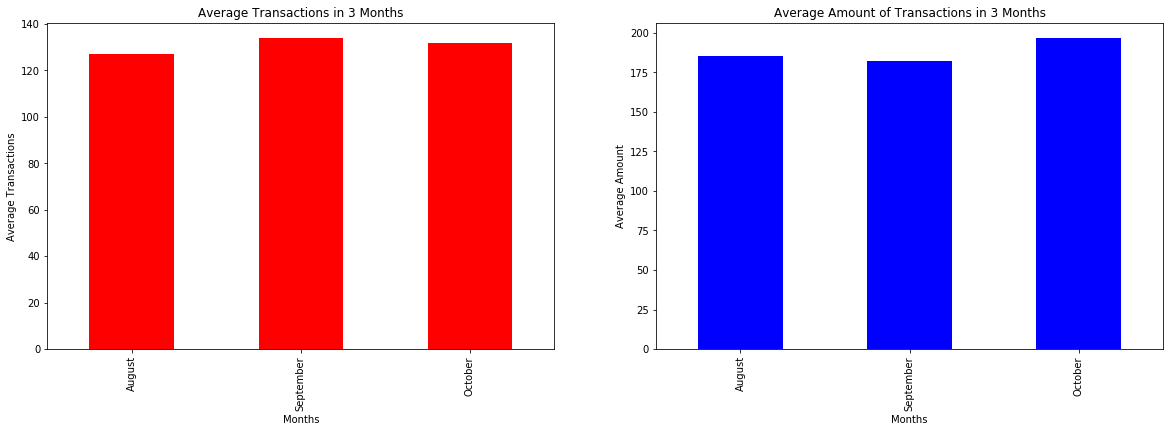

In [79]:
#Plot avg_txn_by_mth side by side
fig = plt.figure() # Create figure

# Add subplots
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

# For sub_ plot 1
avg_txn_by_mth['avg_cnt'].plot(kind = 'bar', color = 'red', figsize = (20, 6), ax = ax0)
ax0.set_title("Average Transactions in 3 Months")
ax0.set_xlabel("Months")
ax0.set_ylabel("Average Transactions")

# For sub_plot 2
avg_txn_by_mth['avg_amt'].plot(kind = 'bar', color = 'blue', figsize = (20, 6), ax = ax1)
ax1.set_title("Average Amount of Transactions in 3 Months")
ax1.set_xlabel("Months")
ax1.set_ylabel("Average Amount")


In [16]:
# Impact by location
df['merchant_state'].describe(include = 'all')

count     7717
unique       8
top        NSW
freq      2169
Name: merchant_state, dtype: object

In [17]:
# Segment the transaction on the basis in their states for the course of three month 
# Ignore the NAN field for the state
txn_by_state = {
    'count': {},
    'amount': {}
}

index = 0
for state in df['merchant_state']:
    if str(state) == str(np.nan):
        pass
    elif state not in txn_by_state['count']:
        txn_by_state['count'][state] = 1
        txn_by_state['amount'][state] = df['amount'][index]
    else:
        txn_by_state['count'][state] += 1
        txn_by_state['amount'][state] += df['amount'][index]
    index += 1
total_txn = sum(txn_by_state['count'].values())
total_amt = sum(txn_by_state['amount'].values())
txn_by_state

{'count': {'QLD': 1556,
  'NSW': 2169,
  'VIC': 2131,
  'WA': 1100,
  'SA': 415,
  'NT': 205,
  'TAS': 68,
  'ACT': 73},
 'amount': {'QLD': 53483.4500000001,
  'NSW': 102021.76999999997,
  'VIC': 87584.00000000009,
  'WA': 33992.05999999999,
  'SA': 16776.570000000007,
  'NT': 9168.89,
  'TAS': 1962.9299999999996,
  'ACT': 4876.679999999999}}

([<matplotlib.axis.XTick at 0x7f1364ac5080>,
 <a list of 8 Text xticklabel objects>)

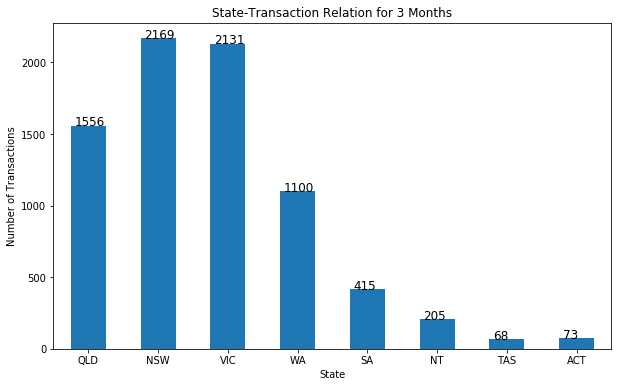

In [18]:
# Plot the total transaction for each state

pd.DataFrame(txn_by_state)['count'].plot(kind = 'bar', figsize = (10, 6))
x_labels = [i for i in txn_by_state['count'].values()]

for i in range(8):
    plt.text(x = i - 0.2, y = x_labels[i] + 0.8, s = x_labels[i], size = 12)

plt.xlabel('State')
plt.ylabel('Number of Transactions')
plt.title("State-Transaction Relation for 3 Months")
plt.xticks(np.arange(8), (txn_by_state['count'].keys()), rotation = 0)



([<matplotlib.axis.XTick at 0x7f1364a47828>,
 <a list of 8 Text xticklabel objects>)

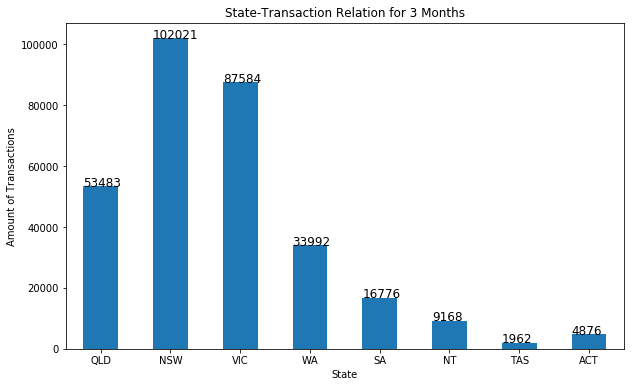

In [19]:
# Plot the amount of transactions for each state 

pd.DataFrame(txn_by_state)['amount'].plot(kind = 'bar', figsize = (10, 6))
x_labels = [i for i in txn_by_state['amount'].values()]

for i in range(8):
    plt.text(x = i - 0.25, y = x_labels[i] + 0.8, s = int(x_labels[i]), size = 12)

plt.xlabel('State')
plt.ylabel('Amount of Transactions')
plt.title("State-Transaction Relation for 3 Months")
plt.xticks(np.arange(8), (txn_by_state['count'].keys()), rotation = 0)

